# Run Single Simulation of Ising Model Using Glaubber Dynamics

Simulate Ising model using Glaubber Dynamics Methodology (https://en.wikipedia.org/wiki/Glauber_dynamics)

In [1]:
from nxdynamics.src.graphs.complete_graph import CompleteGraph
from nxdynamics.src.time_evolution.ising_model.glaubber import GlaubberDynamics

import numpy as np

# Parameters of simulation
size = 1000
beta = np.inf
initial_mean = -0.4
time = 100

# Run simulation
inital_spins = CompleteGraph(size=size, mean=initial_mean)
sim = GlaubberDynamics(graph=inital_spins,
                       beta=beta)
sim.run_simulation(total_steps=time,
                   record_sweep=True)

100%|██████████| 100/100 [01:08<00:00,  1.47it/s]


Our final magnetization is -0.446


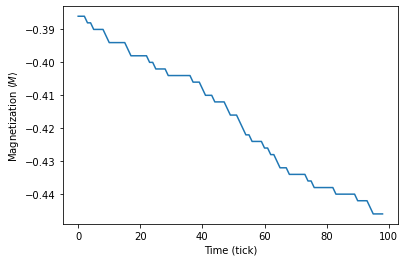

In [5]:
import matplotlib.pyplot as plt

magnetization = []

for i in range(1,time):
    spins = sim.data[i]['node_value']
    magnetization_at_i = np.sum(spins) / size

    magnetization.append(magnetization_at_i)

final_magnetization = np.sum(sim.data[time]['node_value']) / size
print(f"Our final magnetization is {final_magnetization}")

plt.plot(magnetization)
plt.xlabel('Time (tick)')
plt.ylabel(r"Magnetization $\langle M \rangle$")
plt.show()

# Run Averaged Glaubber Dynamics

We want to check this simulation exhibits a phase transition.

This occurs at temperature $T_C$ s.t.
$$ T_C = q J$$

Where $q$ are the number of neighbor sites, and $J$ is the coupling strength.

In [21]:
from nxdynamics.src.graphs.complete_graph import CompleteGraph
from nxdynamics.src.time_evolution.ising_model.glaubber import GlaubberDynamics

import numpy as np
from tqdm import tqdm


# Parameters of simulation
size = 30 # Number of spins
initial_mean = 0 # Initalized spins (magnetization)
time = 1000 # total time steps

trials_per_temp = 100
temp_range = np.linspace(0, 5, 100)


all_mag = []
for temp in tqdm(temp_range):
    beta = 1/np.float32(temp)
    mag_at_temp = []
    for trial in range(trials_per_temp):
        inital_spins = CompleteGraph(size=size, mean=initial_mean)
        sim = GlaubberDynamics(graph=inital_spins,
                               beta=beta)
        sim.run_simulation(total_steps=time,
                           record_sweep=False,
                           record_final=True)

        final_magnetization = np.sum(sim.data[1]['node_value']) / size
        mag_at_temp.append(final_magnetization)
    all_mag.append(mag_at_temp)

  0%|          | 0/100 [00:00<?, ?it/s]

/var/folders/wd/zr_by8q96891mxc_506sm9sr0000gn/T/ipykernel_22360/1108653004.py:19: RuntimeWarning: divide by zero encountered in true_divide
  beta = 1/np.float32(temp)
  1%|          | 1/100 [00:18<30:41, 18.60s/it]/Users/clarkmiyamoto/opt/anaconda3/lib/python3.9/site-packages/nxdynamics/src/time_evolution/ising_model/glaubber.py:38: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(beta * deltaH))
100%|██████████| 100/100 [31:24<00:00, 18.84s/it]


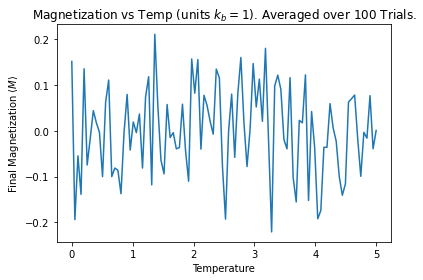

In [26]:
import matplotlib.pyplot as plt

mag_at_t = []
for trial in all_mag:
    mag = sum(trial) / len(trial)
    mag_at_t.append(mag)

plt.plot(temp_range,mag_at_t)
plt.title('Magnetization vs Temp (units $k_b = 1$). Averaged over 100 Trials.')
plt.xlabel('Temperature')
plt.ylabel(r'Final Magnetization $\langle M \rangle$')
plt.show()